In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [4]:
def load_dataset():

    with h5py.File('datasets/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('datasets/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


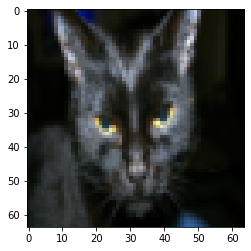

In [6]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


In [7]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
#Finding the shaes as required
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]

num_px = train_set_x_orig[0].shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [9]:
#Flattening the dataframe as well as making sure that data is column stacked

train_set_x_flatten = (train_set_x_orig.reshape(m_train,-1)).T
test_set_x_flatten = (test_set_x_orig.reshape(m_test,-1)).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [10]:
#STandardizing the dataset by just diviing by 255

train_set_x = train_set_x_flatten/255;
test_set_x = test_set_x_flatten/255;

In [11]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [13]:
#Checking sigmoid
print(sigmoid(np.array([[0,2]])))

[[0.5        0.88079708]]


In [14]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [15]:
#Checking initializing parameter fn

dim = 4
w, b = initialize_with_zeros(dim)

In [16]:
w, b

(array([[0.],
        [0.],
        [0.],
        [0.]]),
 0)

In [56]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    #Forward Propogation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    L = Y*np.log(A) + (1-Y)*np.log(1-A)
    J = (-1/m)*np.sum(L, axis=1)
    
    #Computing Gradients
    dZ = A-Y
    dw =(1/m)*np.dot(X,dZ.T)
    db = (1/m)*np.sum(dZ)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, J

In [57]:
#Checking the propogate function

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [62]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        #Finding cost and gradients in the current iteration with the entire dataset using propagate
        
        grads, cost = propagate(w, b, X, Y)
        
        #Updating the parameters
        
        w = w - learning_rate*grads['dw']
        b = b - learning_rate*grads['db']
        
        #Recording the cost for every 100 epochs
        if i%100 == 0:
            if print_cost == True:
                print(f"Error at {i}th epoch is {cost}")
            costs.append(cost)
        
    params = {'w' : w
             , 'b' : b} #Weight and bias values after all epochs

    grads = {'dw' : grads['dw']
            , 'db' : grads['db']} #Gradient values after all epochs

    return params, grads, costs
        
        

In [63]:
#Checking with values
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [64]:
def predict(w, b, X):
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    
    Y_pred = np.where(A>0.5,1,0)
    
    return Y_pred

In [65]:
#Checking with values
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1 0]]


In [70]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost = False):
    
    #Initializing the parameters with 0
    w, b = initialize_with_zeros(X_train.shape[0])
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #Retrieving the parameters for prediction
    w = parameters['w']
    b = parameters['b']
    
    #Predicting the values for X_train and X_test
    Y_predict_test = predict(w, b, X_test)
    Y_predict_train = predict(w, b, X_train)
    
    #Printing all the values
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_predict_test, 
         "Y_prediction_train" : Y_predict_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [71]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


Error at 0th epoch is 0.6931471805599453
Error at 100th epoch is 0.5845083636993087
Error at 200th epoch is 0.4669490409465547
Error at 300th epoch is 0.37600686694802077
Error at 400th epoch is 0.33146328932825136
Error at 500th epoch is 0.30327306747438293
Error at 600th epoch is 0.27987958658260487
Error at 700th epoch is 0.2600421369258757
Error at 800th epoch is 0.2429406846779662
Error at 900th epoch is 0.2280042225672606
Error at 1000th epoch is 0.2148195137844964
Error at 1100th epoch is 0.20307819060644985
Error at 1200th epoch is 0.1925442771670686
Error at 1300th epoch is 0.183033337968835
Error at 1400th epoch is 0.17439859438448874
Error at 1500th epoch is 0.16652139705400335
Error at 1600th epoch is 0.15930451829756614
Error at 1700th epoch is 0.15266732471296507
Error at 1800th epoch is 0.1465422350398234
Error at 1900th epoch is 0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Text(0.5, 1.0, 'Learning rate = 0.005')

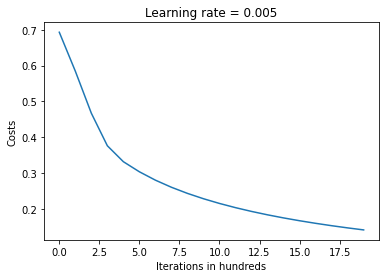

In [75]:
#PLotting the learning curve with a graph
costs = np.squeeze(d['costs'])

plt.plot(costs)
plt.ylabel('Costs')
plt.xlabel('Iterations in hundreds')
plt.title('Learning rate = ' +str(d['learning_rate']))